In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Dataset link: https://drive.google.com/file/d/1SASbfSXeRFSqcHwa-AKC8wgAAy2ncLUQ/view?usp=sharing
The dataset contains unemployment figures of 235 countries from 1991 to 2021. The task is to perform EDA and apply prediction algorithms on the dataset.

In [ ]:
unempdf=pd.read_csv("unemployment_analysis.csv")

In [ ]:
print(unempdf.head())

                  Country Name Country Code        1991        1992  \
0  Africa Eastern and Southern          AFE    7.8 lacs   7.84 lacs   
1                  Afghanistan          AFG  10.65 lacs  10.82 lacs   
2   Africa Western and Central          AFW   4.42 lacs   4.53 lacs   
3                       Angola          AGO   4.21 lacs   4.21 lacs   
4                      Albania          ALB  10.31 lacs  30.01 lacs   

         1993        1994        1995        1996        1997        1998  \
0   7.85 lacs   7.84 lacs   7.83 lacs   7.84 lacs   7.86 lacs   7.81 lacs   
1  10.72 lacs  10.73 lacs  11.18 lacs  10.96 lacs  10.78 lacs   10.8 lacs   
2   4.55 lacs   4.54 lacs   4.53 lacs   4.57 lacs    4.6 lacs   4.66 lacs   
3   4.23 lacs   4.16 lacs   4.11 lacs    4.1 lacs   4.09 lacs   4.07 lacs   
4  25.26 lacs  20.84 lacs  14.61 lacs  13.93 lacs  16.88 lacs  20.05 lacs   

   ...        2012        2013        2014        2015        2016  \
0  ...   6.56 lacs   6.45 lacs   6.41 la

In [ ]:
unempdf.shape

(235, 33)

In [ ]:
unempdf.describe().T

,count,unique,top,freq
Country Name,235,235,Africa Eastern and Southern,1
Country Code,235,235,AFE,1
1991,235,216,1.9 lacs,4
1992,235,207,4.99 lacs,3
1993,235,210,6.6 lacs,4
1994,235,214,6.59 lacs,3
1995,235,213,5.63 lacs,3
1996,235,217,6.6 lacs,3
1997,235,217,6.63 lacs,3
1998,235,212,2.9 lacs,3


## EDA and Data Cleaning

In [ ]:
years=unempdf.filter(regex='[1-2][0-9]{3}',axis=1)
for i in years:
  if i == '1991':
    years[i] = years[i].squeeze()
  years[i]=pd.DataFrame(years[i].replace('[^\d.]+', '')).astype(float)

# print(years)
years = years.T.drop_duplicates().T
newdf = [unempdf.iloc[:,0:2],years]
unempdf = pd.concat(newdf,axis=1,join='inner')
print(unempdf.head())

                  Country Name Country Code   1991   1992   1993   1994  \
0  Africa Eastern and Southern          AFE   7.80   7.84   7.85   7.84   
1                  Afghanistan          AFG  10.65  10.82  10.72  10.73   
2   Africa Western and Central          AFW   4.42   4.53   4.55   4.54   
3                       Angola          AGO   4.21   4.21   4.23   4.16   
4                      Albania          ALB  10.31  30.01  25.26  20.84   

    1995   1996   1997   1998  ...   2012   2013   2014   2015   2016   2017  \
0   7.83   7.84   7.86   7.81  ...   6.56   6.45   6.41   6.49   6.61   6.71   
1  11.18  10.96  10.78  10.80  ...  11.34  11.19  11.14  11.13  11.16  11.18   
2   4.53   4.57   4.60   4.66  ...   4.64   4.41   4.69   4.63   5.57   6.02   
3   4.11   4.10   4.09   4.07  ...   7.35   7.37   7.37   7.39   7.41   7.41   
4  14.61  13.93  16.88  20.05  ...  13.38  15.87  18.05  17.19  15.42  13.62   

    2018   2019   2020   2021  
0   6.73   6.91   7.56   8.11  
1  1

In [ ]:
print(unempdf.dtypes)

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [ ]:
# unempdf['Country Name'].unique()
di = unempdf.set_index('Country Name').T.to_dict('list');
for i in di.keys():
  print(i,di[i][0])

Africa Eastern and Southern AFE
Afghanistan AFG
Africa Western and Central AFW
Angola AGO
Albania ALB
Arab World ARB
United Arab Emirates ARE
Argentina ARG
Armenia ARM
Australia AUS
Austria AUT
Azerbaijan AZE
Burundi BDI
Belgium BEL
Benin BEN
Burkina Faso BFA
Bangladesh BGD
Bulgaria BGR
Bahrain BHR
Bahamas, The BHS
Bosnia and Herzegovina BIH
Belarus BLR
Belize BLZ
Bolivia BOL
Brazil BRA
Barbados BRB
Brunei Darussalam BRN
Bhutan BTN
Botswana BWA
Central African Republic CAF
Canada CAN
Central Europe and the Baltics CEB
Switzerland CHE
Channel Islands CHI
Chile CHL
China CHN
Cote d'Ivoire CIV
Cameroon CMR
Congo, Dem. Rep. COD
Congo, Rep. COG
Colombia COL
Comoros COM
Cabo Verde CPV
Costa Rica CRI
Caribbean small states CSS
Cuba CUB
Cyprus CYP
Czech Republic CZE
Germany DEU
Djibouti DJI
Denmark DNK
Dominican Republic DOM
Algeria DZA
East Asia & Pacific (excluding high income) EAP
Early-demographic dividend EAR
East Asia & Pacific EAS
Europe & Central Asia (excluding high income) ECA
Europe

In [ ]:
und = pd.DataFrame(years.to_dict())
und['Total unemployment'] = und.sum(axis=1)
# Total unemployment of all countries
print(und['Total unemployment'])

0      224.57
1      345.38
2      153.27
3      169.02
4      505.86
        ...  
230    180.98
231    365.60
232    875.21
233    407.96
234    160.50
Name: Total unemployment, Length: 235, dtype: float64


In [ ]:
def data_cleaning():
  unempdf.isna().sum(axis=1)
  print(unempdf[unempdf.isnull().any(axis=1)])
  unempd = unempdf.fillna(unempdf.mean())
  print(unempd.isnull().sum())
data_cleaning()

        Country Name Country Code       1991       1992       1993       1994  \
136  North Macedonia          MKD  24.5 lacs  26.3 lacs  27.7 lacs    30 lacs   
228          Vanuatu          VUT  1.68 lacs  1.69 lacs  1.73 lacs  1.59 lacs   

          1995       1996       1997       1998  ...        2012       2013  \
136  35.6 lacs  38.8 lacs    36 lacs  34.5 lacs  ...  31.02 lacs    29 lacs   
228  1.74 lacs  1.72 lacs  1.68 lacs  1.76 lacs  ...   1.85 lacs  1.86 lacs   

           2014       2015        2016        2017        2018        2019  \
136  28.03 lacs        NaN  23.72 lacs  22.38 lacs  20.74 lacs  17.26 lacs   
228   1.81 lacs  1.86 lacs   1.78 lacs   1.75 lacs   1.81 lacs    1.8 lacs   

          2020       2021  
136  17.2 lacs  16.2 lacs  
228  2.12 lacs  2.18 lacs  

[2 rows x 33 columns]
Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998          

Empty DataFrame
Columns: [Country Name, Country Code, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []

[0 rows x 33 columns]
Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64


In [ ]:

# print(df)
# df=benin.iloc[:,2:]
# outliers=[]
# def detect_outlier(data_1):
    
#     threshold=np.median(data_1)
#     mean_1 = np.mean(data_1)
#     std_1 =np.std(data_1)
    
#     for y in data_1:
#         z_score= (y - mean_1)/std_1 
#         # print(z_score,threshold)
#         if np.abs(z_score) > threshold:
#             outliers.append(y)
#     return outliers
# outlier_datapoints = detect_outlier(df)
# print(outlier_datapoints)

<Axes: >

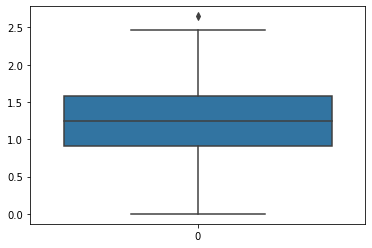

In [ ]:
benin=(unempdf[unempdf['Country Name']=='Benin']).T.drop(['Country Name','Country Code']).T
bah=unempdf[unempdf['Country Name']=='Bahrain'].T.drop(['Country Name','Country Code']).T
df=benin.values.tolist()[0]
df2=bah.values.tolist()[0]
sns.boxplot(df)

<Axes: >

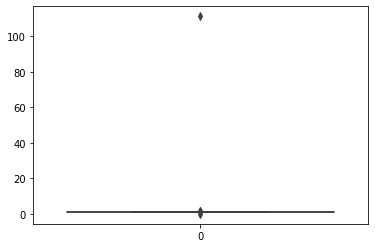

In [ ]:
sns.boxplot(df2)

In [ ]:
# Function to find outliers using IQR
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
# For Benin
outliers = find_outliers_IQR(pd.DataFrame(df))

print("number of outliers: "+ str(outliers.notna().sum()))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))
print(outliers)

number of outliers: 0    1
dtype: int64
max outlier value: 0    2.65
dtype: float64
min outlier value: 0    2.65
dtype: float64
       0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20  2.65
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN


In [ ]:
# For Bahrain
outliers2 = find_outliers_IQR(pd.DataFrame(df2))

print("number of outliers:",outliers2.notna().sum())

print("max outlier value: "+ str(outliers2.max()))

print("min outlier value: "+ str(outliers2.min()))
print(outliers2)

number of outliers: 0    4
dtype: int64
max outlier value: 0    111.2
dtype: float64
min outlier value: 0    0.00011
dtype: float64
            0
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10  111.20000
11        NaN
12        NaN
13        NaN
14        NaN
15    0.00011
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29    1.78000
30    1.87000


In [ ]:
from statistics import mean
for i in range(len(df)):
  if df[i] in outliers.values:
    df[i] = mean(df)
print(df)
outliers = find_outliers_IQR(pd.DataFrame(df))
print("number of outliers: "+ str(outliers.notna().sum()))

[1.49, 1.51, 1.41, 1.36, 1.25, 1.18, 1.1, 1.02, 0.94, 0.85, 0.77, 0.69, 0.74, 0.77, 8.2e-06, 0.86, 0.89, 0.94, 1.0, 1.04, 1.320000264516129, 2.47, 2.29, 2.13, 2.01, 1.83, 1.64, 1.47, 1.47, 1.58, 1.57]
number of outliers: 0    0
dtype: int64


In [ ]:
for i in range(len(df2)):
  if df2[i] in outliers2.values:
    df2[i] = mean(df2)
print(df2)
outliers2 = find_outliers_IQR(pd.DataFrame(df2))
print("number of outliers: "+ str(outliers2.notna().sum()))

for i in range(len(df2)):
  if df2[i] in outliers2.values:
    df2[i] = mean(df2)
print(df2)
outliers2 = find_outliers_IQR(pd.DataFrame(df2))
print("number of outliers: "+ str(outliers2.notna().sum()))


[1.01, 1.05, 1.01, 1.11, 1.08, 1.08, 1.09, 1.08, 1.09, 1.08, 4.68064870967742, 1.11, 1.09, 1.09, 1.09, 1.2445406035379813, 1.09, 1.11, 1.14, 1.13, 1.18, 1.2, 1.18, 1.19, 1.2, 1.19, 1.18, 1.2, 1.2, 1.284683526232755, 1.2687055754660697]
number of outliers: 0    1
dtype: int64
[1.01, 1.05, 1.01, 1.11, 1.08, 1.08, 1.09, 1.08, 1.09, 1.08, 1.2493089811262654, 1.11, 1.09, 1.09, 1.09, 1.2445406035379813, 1.09, 1.11, 1.14, 1.13, 1.18, 1.2, 1.18, 1.19, 1.2, 1.19, 1.18, 1.2, 1.2, 1.284683526232755, 1.2687055754660697]
number of outliers: 0    0
dtype: int64


In [ ]:
unempdf2 = pd.melt(unempdf,id_vars=['Country Name','Country Code'],var_name='Year',value_name='No. of unemployed')
print(unempdf2.head())

                  Country Name Country Code  Year  No. of unemployed
0  Africa Eastern and Southern          AFE  1991               7.80
1                  Afghanistan          AFG  1991              10.65
2   Africa Western and Central          AFW  1991               4.42
3                       Angola          AGO  1991               4.21
4                      Albania          ALB  1991              10.31


In [ ]:
df_pivot = unempdf2.groupby(['Country Name','Country Code','Year']).sum().reset_index();
print(df_pivot)

     Country Name Country Code  Year  No. of unemployed
0     Afghanistan          AFG  1991              10.65
1     Afghanistan          AFG  1992              10.82
2     Afghanistan          AFG  1993              10.72
3     Afghanistan          AFG  1994              10.73
4     Afghanistan          AFG  1995              11.18
...           ...          ...   ...                ...
7280     Zimbabwe          ZWE  2017               4.78
7281     Zimbabwe          ZWE  2018               4.80
7282     Zimbabwe          ZWE  2019               4.83
7283     Zimbabwe          ZWE  2020               5.35
7284     Zimbabwe          ZWE  2021               5.17

[7285 rows x 4 columns]


In [ ]:
df_pivot.rename(columns={'Country Name':'Country_name','Country Code':'Country_code'},inplace=True)
print(df_pivot.head())

  Country_name Country_code  Year  No. of unemployed
0  Afghanistan          AFG  1991              10.65
1  Afghanistan          AFG  1992              10.82
2  Afghanistan          AFG  1993              10.72
3  Afghanistan          AFG  1994              10.73
4  Afghanistan          AFG  1995              11.18


In [ ]:
def descriptive_stats(country_code):
  print("\nStatistics for country with code",country_code)
  # Mean, median, mode, standard deviation of 
  unemp = (df_pivot.loc[df_pivot['Country_code']==country_code])['No. of unemployed']
  print("Mean:",unemp.mean())
  print("Median:",unemp.median())
  print("Mode:",unemp.mode())
  print("Standard deviation:",unemp.std())

  # Max and min unemployment
  matches=df_pivot.loc[df_pivot['No. of unemployed']==unemp.max()]
  print("Maximum:\n",matches.loc[matches['Country_code'] == country_code]['Year'])
  matches=df_pivot.loc[df_pivot['No. of unemployed']==unemp.min()]
  print("Minimum:\n",matches.loc[matches['Country_code'] == country_code]['Year'])

# 5 countries with maximum unemployment in 2021 were
print("Top 5 countries with max unemployment in 2021")
unemp2021 = df_pivot.loc[df_pivot['Year']=='2021']
top5=unemp2021.nlargest(5,columns='No. of unemployed')
print(top5)

# Top 3 countries with unemployment greater than 2021 
print("Top 3 countries with unemployment greater than 5 lakhs in 2021")
print(unemp2021.loc[unemp2021['No. of unemployed']>5].nlargest(3,columns='No. of unemployed'))

# Percentage change in unemployment
print("Percentage change in unemployment")
# pct = top5['No. of unemployed'].pct_change()
top5rec = pd.DataFrame()
for i in top5['Country_name']:
  top5rec = top5rec.append(df_pivot.loc[df_pivot['Country_name']==i])
# print(top5rec.groupby(['Country_name','Country_code']).first())
# print(top5rec['Country_name'].unique())
pct = top5rec.groupby(['Country_name','Country_code'])['No. of unemployed'].pct_change().mul(100).round(2).shift(-1)
print(pct)
descriptive_stats('AFG')

Top 5 countries with max unemployment in 2021
            Country_name Country_code  Year  No. of unemployed
5982        South Africa          ZAF  2021              33.56
1611            Djibouti          DJI  2021              28.39
1983            Eswatini          SWZ  2021              25.76
7160  West Bank and Gaza          PSE  2021              24.90
743             Botswana          BWA  2021              24.72
Top 3 countries with unemployment greater than 5 lakhs in 2021
      Country_name Country_code  Year  No. of unemployed
5982  South Africa          ZAF  2021              33.56
1611      Djibouti          DJI  2021              28.39
1983      Eswatini          SWZ  2021              25.76
Percentage change in unemployment
5952     0.10
5953    -0.20
5954    -0.10
5955     0.00
5956    -0.07
        ...  
739      2.32
740      2.45
741     10.26
742     -0.84
743       NaN
Name: No. of unemployed, Length: 155, dtype: float64

Statistics for country with code AFG
Mean: 

In [ ]:
descriptive_stats('BGR')


Statistics for country with code BGR
Mean: 10.92193548387097
Median: 11.26
Mode: 0    11.1
Name: No. of unemployed, dtype: float64
Standard deviation: 4.064550339504431
Maximum:
 816    2001
Name: Year, dtype: object
Minimum:
 834    2019
Name: Year, dtype: object


Minimum employment for country with code BGR was in 2019

In [ ]:
pct = df_pivot.groupby(['Country_name','Country_code'])['No. of unemployed'].pct_change()
lis = [df_pivot.iloc[:,0:2],pct]
undf2=pd.concat(lis,axis=1,join='inner')
undf2.rename(columns = {'No. of unemployed':'% change in unemp. compared to prev year'}, inplace = True)
print(undf2)

     Country_name Country_code  % change in unemp. compared to prev year
0     Afghanistan          AFG                                       NaN
1     Afghanistan          AFG                                  0.015962
2     Afghanistan          AFG                                 -0.009242
3     Afghanistan          AFG                                  0.000933
4     Afghanistan          AFG                                  0.041938
...           ...          ...                                       ...
7280     Zimbabwe          ZWE                                 -0.002088
7281     Zimbabwe          ZWE                                  0.004184
7282     Zimbabwe          ZWE                                  0.006250
7283     Zimbabwe          ZWE                                  0.107660
7284     Zimbabwe          ZWE                                 -0.033645

[7285 rows x 3 columns]


In [ ]:
japan=df_pivot[df_pivot['Country_name']=='Japan']
print(japan)
descriptive_stats('JPN')

     Country_name Country_code  Year  No. of unemployed
3286        Japan          JPN  1991               2.10
3287        Japan          JPN  1992               2.20
3288        Japan          JPN  1993               2.50
3289        Japan          JPN  1994               2.90
3290        Japan          JPN  1995               3.20
3291        Japan          JPN  1996               3.40
3292        Japan          JPN  1997               3.40
3293        Japan          JPN  1998               4.10
3294        Japan          JPN  1999               4.70
3295        Japan          JPN  2000               4.75
3296        Japan          JPN  2001               5.02
3297        Japan          JPN  2002               5.39
3298        Japan          JPN  2003               5.25
3299        Japan          JPN  2004               4.73
3300        Japan          JPN  2005               4.45
3301        Japan          JPN  2006               4.19
3302        Japan          JPN  2007            

Comparing Japan's unemployment rate in 1991 with next year since previous year data is not available

In [ ]:
pctnextyr = japan['No. of unemployed'].pct_change().mul(100).round(2).shift(-1)
print(pctnextyr.iloc[0])

4.76


Unemployment rate of 1991 was 4.76% greater than when compared to 1992
(since % change = 1992_val-1991_val/1991_val)

In [ ]:
print(undf2[undf2['Country_code']=='MDA']['% change in unemp. compared to prev year'].min())

-0.3130081300813008


## Plots

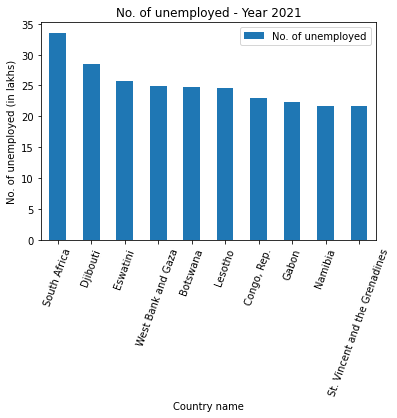

In [ ]:
top10unemp=unemp2021.nlargest(10,columns='No. of unemployed')
top10unemp.plot.bar(x='Country_name', y="No. of unemployed", rot=70, title="No. of unemployed - Year 2021");
plt.xlabel("Country name")
plt.ylabel("No. of unemployed (in lakhs)")
plt.show()

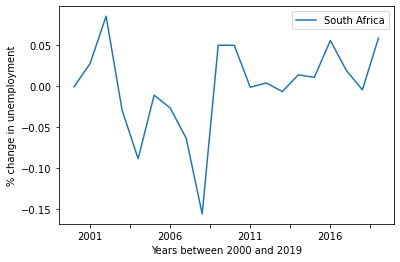

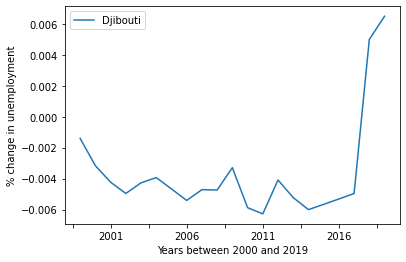

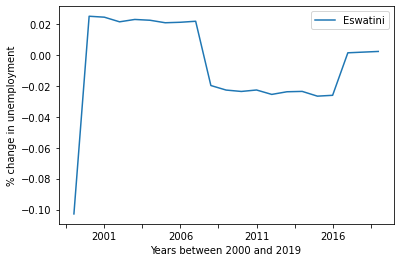

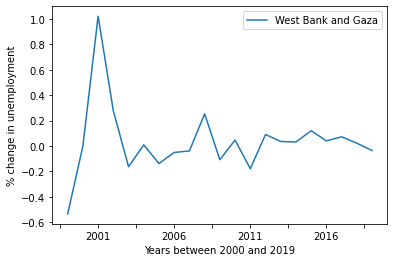

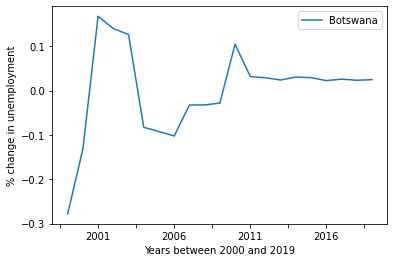

In [ ]:
top5rec['% change'] = top5rec[top5rec['Year']>'1998'][top5rec['Year']<'2020']['No. of unemployed'].pct_change()
for i in top5rec.dropna()['Country_name'].unique():
  top5rec[top5rec['Country_name']==i].plot.line(x='Year',y='% change',label=i)
  plt.xlabel("Years between 2000 and 2019")
  plt.ylabel("% change in unemployment")
plt.legend()
plt.show()

Below for prediction plot

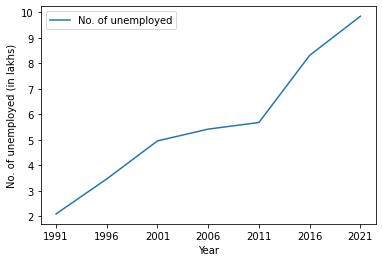

In [ ]:
wsm=df_pivot[df_pivot['Country_code']=='WSM']
# print(wsm.iloc[::5,:])
wsm.iloc[::5,:].plot.line(x='Year',y='No. of unemployed')
plt.xlabel("Year")
plt.ylabel("No. of unemployed (in lakhs)")
plt.show()

The above graphs on 2021's 5 highest unemployed countries show that most of them are stabilizing at rate while South Africa and Djibouti's are still increasing percent change of unemployment.

## ML prediction

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import train_test_split

In [ ]:
# years['MA_3'] = years.iloc[:,1].rolling(window=3).mean()
# print(years)
def sma(data, n):
  sma = data.rolling(window = n).mean()
  return pd.DataFrame(sma)

def predict_future(no_yr):
  for i in range(no_yr):
    years[f'sma_3_{i}'] = sma(years.iloc[:-(i+1),1], 3)
  print(years.tail())

predict_future(2)

      1991   1992   1993   1994   1995   1996   1997   1998   1999   2000  \
230   2.10   2.38   2.63   3.04   3.19   3.47   3.90   4.18   4.48   4.66   
231   8.32   8.31   8.35   8.34   8.96   9.59  10.20  10.81  11.46  11.56   
232  29.95  29.98  29.92  29.89  29.89  29.87  29.91  29.95  29.91  29.88   
233  18.90  19.37  19.70  18.43  16.81  15.30  13.64  12.00  12.44  12.93   
234   4.94   4.99   4.97   4.96   5.63   6.25   6.93   6.46   6.00   5.69   

     ...   2014   2015   2016   2017   2018   2019   2020   2021    sma_3_0  \
230  ...   8.72   8.50   8.31   8.58   8.69   8.41   9.15   9.84   3.010000   
231  ...  13.47  13.77  13.43  13.30  13.15  13.06  13.39  13.57   5.216667   
232  ...  24.89  25.15  26.54  27.04  26.91  28.47  29.22  33.56  13.556667   
233  ...   9.36  10.13  10.87  11.63  12.01  12.52  12.85  13.03  19.220000   
234  ...   4.77   4.78   4.79   4.78   4.80   4.83   5.35   5.17        NaN   

       sma_3_1  
230   3.010000  
231   5.216667  
232  13.556

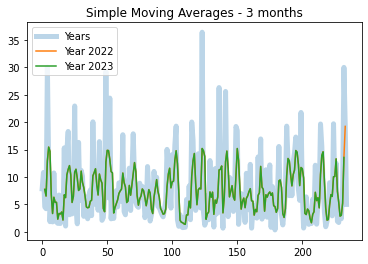

In [ ]:
plt.plot(years.iloc[:,1], label = 'Years', linewidth = 5, alpha = 0.3)
plt.plot(years['sma_3_0'], label = 'Year 2022')
plt.plot(years['sma_3_1'], label = 'Year 2023')
plt.title('Simple Moving Averages - 3 months')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("Minimum in 2022:",years['sma_3_0'].min(),"\nMaximum in 2022:",years['sma_3_0'].max())
print("Minimum in 2023:",years['sma_3_1'].min(),"\nMaximum in 2023:",years['sma_3_1'].max())

Minimum in 2022: 1.3566666666666656 
Maximum in 2022: 19.22
Minimum in 2023: 1.3566666666666656 
Maximum in 2023: 15.446666666666665


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
msk = (years.index < len(years)-30)
df_train = years[msk].copy()
df_test = years[~msk].copy()
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())